# Plots and calculations for ICRC 2025

In [1]:
from pathlib import Path

from matplotlib import pyplot as plt

from bayesian_analysis import FitConfig
from cr_knee_fit import experiments, plotting
from cr_knee_fit.elements import Element
from cr_knee_fit.fit_data import Data, DataConfig
from cr_knee_fit.utils import E_GEV_LABEL, LN_A_LABEL, legend_artist_line, legend_with_added_items

In [2]:
dc_all = DataConfig(
    experiments_elements=list(experiments.ICRC25),
    experiments_all_particle=experiments.ICRC25,
    experiments_lnA=experiments.ICRC25,
)

In [3]:
dc_direct = DataConfig(
    experiments_elements=list(experiments.DIRECT),
    experiments_all_particle=[],
    experiments_lnA=[],
    elements_R_bounds=(500, 1e8),
)

data_direct = Data.load(dc_direct)
data_le = Data.load(
    DataConfig(
        experiments_elements=list(experiments.DIRECT),
        experiments_all_particle=[],
        experiments_lnA=[],
        elements_R_bounds=(1, 500),
    )
)

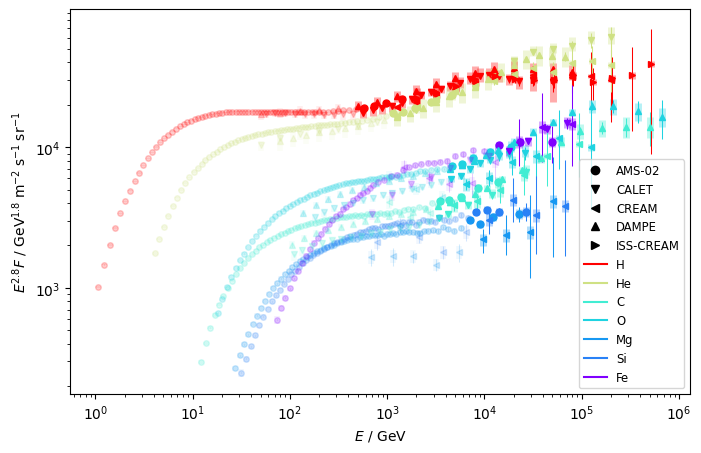

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

scale = 2.8

for exp, ps in data_direct.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_legend_label=False, is_fitted=True, marker_size=5.0)
for exp, ps in data_le.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_legend_label=False, is_fitted=False)


ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_direct.experiments(spectra_only=True))
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="small",
)

plt.show()

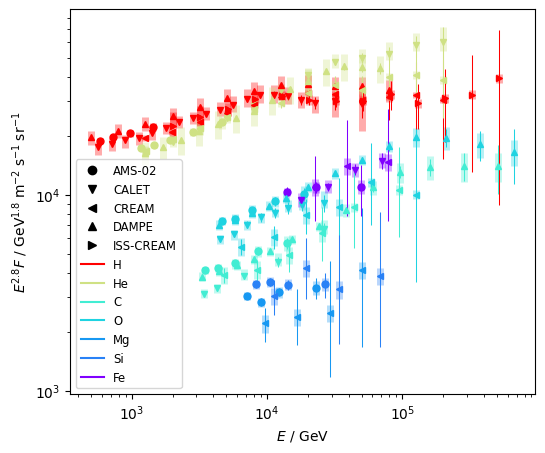

In [7]:
fig, ax = plt.subplots(figsize=(6, 5))

scale = 2.8

for exp, ps in data_direct.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_legend_label=False, is_fitted=True, marker_size=5.0)

ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_direct.experiments(spectra_only=True))
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="small",
)

plt.show()

In [9]:
data_grapes = Data.load(DataConfig(experiments_elements=[experiments.grapes]))

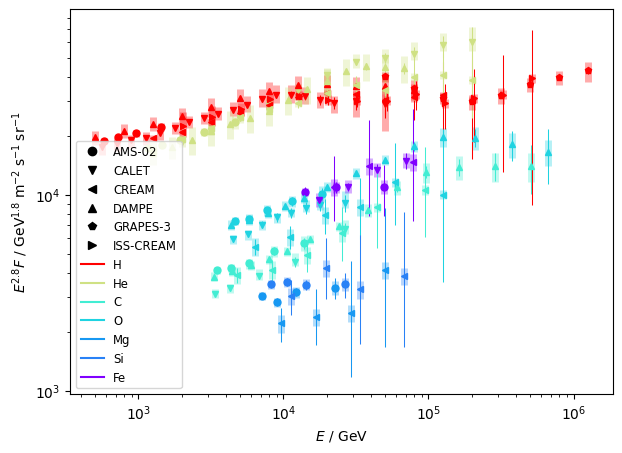

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))

scale = 2.8

for exp, ps in data_direct.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_legend_label=False, is_fitted=True, marker_size=5.0)
for exp, ps in data_grapes.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_legend_label=False, is_fitted=True, marker_size=5.0)

ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(
            data_direct.experiments(spectra_only=True) + data_grapes.experiments(spectra_only=True)
        )
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="small",
    loc="lower left",
)

plt.show()

In [11]:
lhaaso = experiments.lhaaso_qgsjet
data_lhaaso = Data.load(
    DataConfig(
        experiments_elements=[lhaaso], experiments_all_particle=[lhaaso], experiments_lnA=[lhaaso]
    )
)

In [12]:
data_all = Data.load(
    DataConfig(
        experiments_elements=experiments.DIRECT + [experiments.grapes, lhaaso],
        experiments_all_particle=[experiments.hawc, experiments.grapes, lhaaso],
        experiments_lnA=[lhaaso],
    )
)
data_kascade = Data.load(
    DataConfig(
        # experiments_elements=[experiments.kascade_re_qgsjet],
        experiments_elements=[],
        experiments_all_particle=[experiments.kascade_re_qgsjet],
        experiments_lnA=[experiments.kascade_re_qgsjet],
    )
)

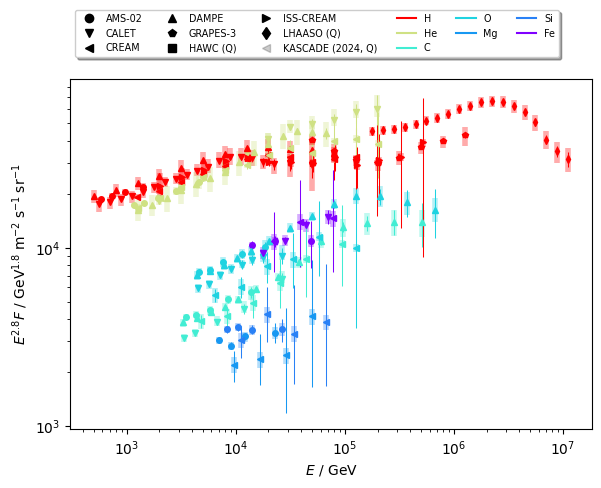

In [14]:
fig, ax = plt.subplots(figsize=(6.2, 5))

scale = 2.8

for exp, ps in data_all.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_legend_label=False, is_fitted=True, marker_size=4.0)
for exp, ps in data_kascade.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_legend_label=False, is_fitted=False)


ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_all.experiments(spectra_only=True))
    ]
    + [
        (exp.legend_artist(is_fitted=False), exp.name)
        for exp in sorted(data_kascade.experiments(spectra_only=True))
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="x-small",
    bbox_to_anchor=(0.00, 1.05, 1.0, 0.0),
    loc="lower left",
    fancybox=True,
    shadow=True,
    ncol=6,
)

fig.tight_layout()
plt.show()

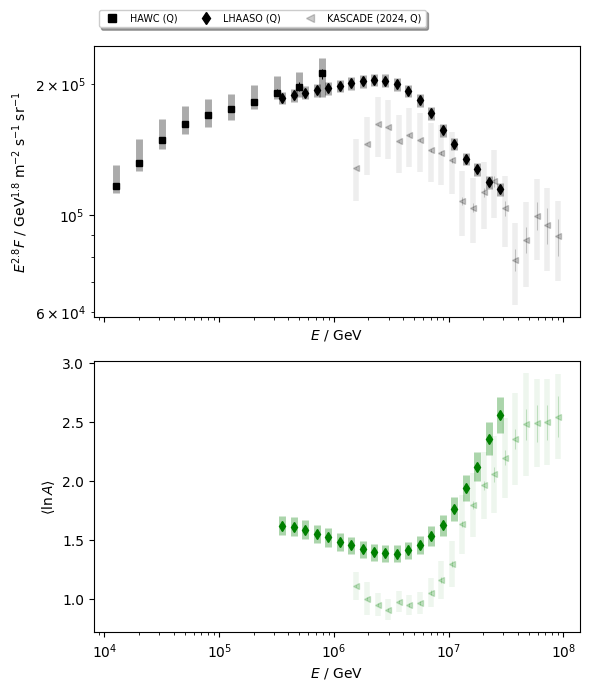

In [16]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(6, 7))

ax_all = axes[0]
ax_lnA = axes[1]

scale = 2.8

for exp, s in data_all.all_particle_spectra.items():
    s.plot(scale=scale, ax=ax_all, add_legend_label=False, is_fitted=True, marker_size=5.0)
for exp, s in data_kascade.all_particle_spectra.items():
    s.plot(scale=scale, ax=ax_all, add_legend_label=False, is_fitted=False)


for exp, s in data_all.lnA.items():
    s.plot(
        scale=0, color="green", ax=ax_lnA, add_legend_label=False, is_fitted=True, marker_size=5.0
    )
for exp, s in data_kascade.lnA.items():
    s.plot(scale=0, color="green", ax=ax_lnA, add_legend_label=False, is_fitted=False)


legend_with_added_items(
    ax_all,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_all.all_particle_spectra.keys())
    ]
    + [
        (exp.legend_artist(is_fitted=False), exp.name)
        for exp in sorted(data_kascade.all_particle_spectra.keys())
    ],
    fontsize="x-small",
    bbox_to_anchor=(0.00, 1.05, 1.0, 0.0),
    loc="lower left",
    fancybox=True,
    shadow=True,
    ncol=4,
)
ax_all.set_xscale("log")
ax_all.set_yscale("log")
ax_lnA.set_xscale("log")
ax_lnA.set_xlabel(E_GEV_LABEL)
ax_lnA.set_ylabel(LN_A_LABEL)

fig.tight_layout()
plt.show()

# Experimental energy scale uncertainties

(10000.0, np.float64(269562.7648563918))

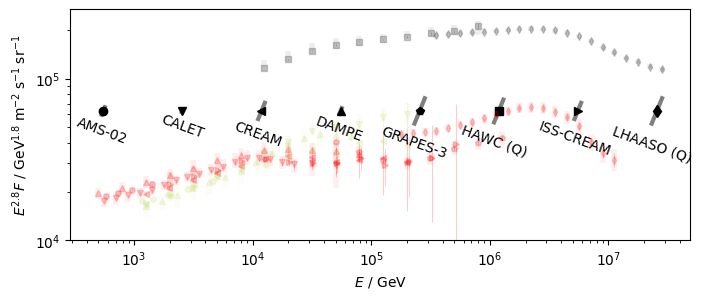

In [17]:
import numpy as np

from cr_knee_fit.inference import energy_scale_lg_uncertainties
from cr_knee_fit.shifts import ExperimentEnergyScaleShifts

data_main = Data.load(
    DataConfig(
        experiments_elements=list(data_all.element_spectra.keys()),
        experiments_all_particle=list(data_all.all_particle_spectra.keys()),
        experiments_lnA=list(data_all.lnA.keys()),
        elements=[Element.H, Element.He],
    )
)

scale = 2.8

fig, ax = plt.subplots(figsize=(8, 3))

data_main.plot_spectra(describe=False, scale=scale, is_fitted=False, ax=ax, legend=False)

experiment_list = data_main.experiments(spectra_only=True)
E_grid = np.geomspace(data_main.E_min() * 1.1, data_main.E_max() / 1.1, num=len(experiment_list))
y_target = 10 ** (4.8)

sigma_shifts = ExperimentEnergyScaleShifts(lg_shifts=energy_scale_lg_uncertainties)

for exp, E in zip(experiment_list, E_grid):
    F = y_target / E**scale
    f = sigma_shifts.f(exp)
    ax.plot(
        [E / f, E * f],
        [f ** -(scale - 1) * y_target, f ** (scale - 1) * y_target],
        color="black",
        alpha=0.5,
        linewidth=3.0,
    )
    ax.plot([E], y_target, marker=exp.marker, markersize=6.0, color="black")
    ax.text(
        E / f,
        f ** -(scale - 1) * y_target,
        exp.name,
        va="top",
        ha="center",
        rotation=-20,
        fontsize="medium",
    )
    # for power in (1, -1):
    #     f = sigma_shifts.f(exp)**power
    #     ax.quiver(
    #         [E], [y_target], [f*E - E], [f**(scale - 1) * y_target - y_target], angles="xy", scale=1.0, scale_units="xy"
    #     )

ax.set_ylim(bottom=1e4)

# Minimal model


In [20]:
FIT_DIR = Path("out/phase-4/basic")

fc = FitConfig.model_validate_json((FIT_DIR / "config-dump.json").read_text())
theta_sample = np.loadtxt(FIT_DIR / "theta.txt")
theta_best_fit = np.loadtxt(FIT_DIR / "posterior-ml.txt")

ppc = plotting.PosteriorPlotConfig(
    # contours=True,
    # tricontourf_kwargs_override={"levels": 30},
    band_cl=0.9,
)

fit_data_config = DataConfig(
    experiments_elements=list(
        experiments.DIRECT
        + [
            experiments.grapes,
            experiments.lhaaso_qgsjet,
        ]
    ),
    experiments_all_particle=[],
    experiments_lnA=[],
    elements=Element.regular(),
)
fit_data = Data.load(fit_data_config)

validation_data_config = DataConfig(
    experiments_elements=[],
    experiments_all_particle=[experiments.lhaaso_qgsjet],
    experiments_lnA=[experiments.lhaaso_qgsjet],
    elements=[],
).excluding(fit_data_config)
val_data = Data.load(validation_data_config)

fig, axes = plt.subplot_mosaic(
    [
        ["Elements", "Elements"],
        ["All particle", "lnA"],
        ["Shifts", "Shifts"],
    ],
    figsize=(8, 8),
    height_ratios=[1, 1, 0.3],
)

fig = plotting.plot_everything(
    plots_config=plotting.PlotsConfig(
        validation_data_config=validation_data_config,
        elements=plotting.PosteriorPlotConfig(
            max_margin_around_data=0.3,
        ),
        all_particle=plotting.PosteriorPlotConfig(
            max_margin_around_data=1.0,
        ),
        all_particle_elements_contribution=ppc,
        lnA=ppc,
        energy_shifts=ppc,
    ),
    theta_sample=theta_sample,
    theta_bestfit=theta_best_fit,
    model_config=fc.model,
    spectra_scale=2.8,
    fit_data=fit_data,
    validation_data=val_data,
    axes=axes,
    legend_ncol=4,
)

fig.savefig("export/minimal-model.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'out/phase-4/basic/config-dump.json'

In [19]:
FIT_DIR = Path("out/2pop")

fc = FitConfig.model_validate_json((FIT_DIR / "config-dump.json").read_text())
theta_sample = np.loadtxt(FIT_DIR / "theta.txt")
theta_best_fit = np.loadtxt(FIT_DIR / "posterior-ml.txt")

ppc = plotting.PosteriorPlotConfig(
    # contours=True,
    # tricontourf_kwargs_override={"levels": 30},
    band_cl=0.9,
)

fit_data_config = DataConfig(
    experiments_elements=list(
        experiments.DIRECT
        + [
            experiments.grapes,
            experiments.lhaaso_qgsjet,
        ]
    ),
    experiments_all_particle=[
        experiments.hawc,
        experiments.lhaaso_qgsjet,
        experiments.kascade_re_qgsjet,
    ],
    experiments_lnA=[],
    elements=Element.regular(),
)
fit_data = Data.load(fit_data_config)

validation_data_config = DataConfig(
    # experiments_elements=[experiments.kascade_re_qgsjet],
    experiments_elements=[],
    experiments_all_particle=[experiments.lhaaso_qgsjet],
    experiments_lnA=[experiments.lhaaso_qgsjet],
    elements=Element.regular(),
).excluding(fit_data_config)
val_data = Data.load(validation_data_config)

fig, axes = plt.subplot_mosaic(
    [
        ["Elements", "Elements"],
        ["All particle", "lnA"],
        ["Shifts", "Shifts"],
    ],
    figsize=(8, 8),
    height_ratios=[1, 1, 0.3],
)

fig = plotting.plot_everything(
    plots_config=plotting.PlotsConfig(
        validation_data_config=validation_data_config,
        elements=plotting.PosteriorPlotConfig(
            max_margin_around_data=0.1,
            population_contribs_best_fit=True,
        ),
        all_particle=plotting.PosteriorPlotConfig(
            max_margin_around_data=1.2,
            population_contribs_best_fit=True,
        ),
        all_particle_elements_contribution=ppc,
        lnA=ppc,
        energy_shifts=ppc,
    ),
    theta_sample=theta_sample,
    theta_bestfit=theta_best_fit,
    model_config=fc.model,
    spectra_scale=2.8,
    fit_data=fit_data,
    validation_data=val_data,
    axes=axes,
    legend_ncol=6,
)

fig.savefig("export/modified-2pop-model.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'out/2pop/config-dump.json'

ExperimentEnergyScaleShifts(lg_shifts={Experiment(name='AMS-02', filename_stem='AMS-02'): np.float64(-0.00714336496723101), Experiment(name='CALET', filename_stem='CALET'): np.float64(0.011704482935822425), Experiment(name='CREAM', filename_stem='CREAM'): np.float64(0.0011763231554382803), Experiment(name='GRAPES-3', filename_stem='GRAPES'): np.float64(-0.0074677055486163935), Experiment(name='HAWC (Q)', filename_stem='HAWC_QGSJET-II-04'): np.float64(0.004328764126502439), Experiment(name='ISS-CREAM', filename_stem='ISS-CREAM'): np.float64(0.004926088292547846), Experiment(name='KASCADE (2024, Q)', filename_stem='KASCADE_re_QGSJET-II-04'): np.float64(0.0022273096039845397), Experiment(name='LHAASO (Q)', filename_stem='LHAASO_QGSJET-II-04'): np.float64(-0.0026722593106305544)})


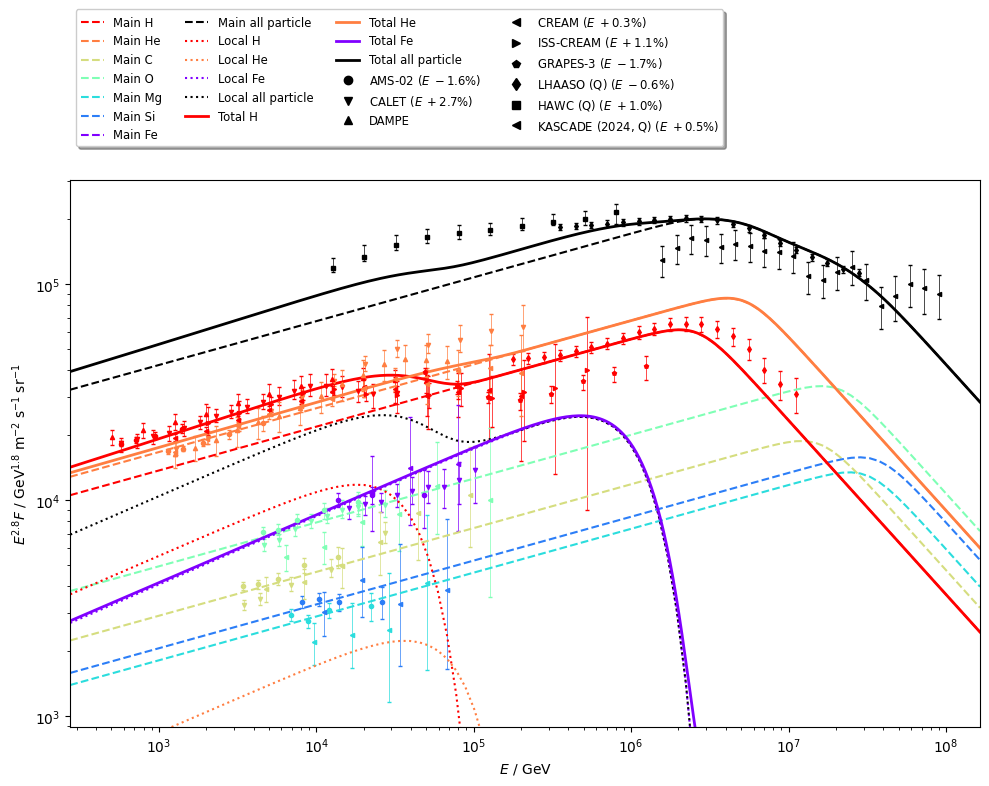

In [ ]:
from cr_knee_fit.model_ import Model

FIT_DIR = Path("out/2pop-local")

fc = FitConfig.model_validate_json((FIT_DIR / "config-dump.json").read_text())
theta_sample = np.loadtxt(FIT_DIR / "theta.txt")
theta_best_fit = np.loadtxt(FIT_DIR / "preliminary-ml.txt")
fit_data = Data.load(fc.fit_data_config)

model = Model.unpack(theta_best_fit, fc.model)
print(model.energy_shifts)
model.plot_spectra(
    fit_data,
    scale=2.8,
);
# fit_data.plot(scale=2.8)

# ppc = plotting.PosteriorPlotConfig(
#     # contours=True,
#     # tricontourf_kwargs_override={"levels": 30},
#     band_cl=0.9,
# )

# fit_data_config = DataConfig(
#     experiments_elements=list(
#         experiments.DIRECT
#         + [
#             experiments.grapes,
#             experiments.lhaaso_qgsjet,
#         ]
#     ),
#     experiments_all_particle=[experiments.hawc, experiments.lhaaso_qgsjet, experiments.kascade_re_qgsjet],
#     experiments_lnA=[],
#     elements=Element.regular(),
# )
# fit_data = Data.load(fit_data_config)

# validation_data_config = DataConfig(
#     experiments_elements=[experiments.kascade_re_qgsjet],
#     experiments_all_particle=[experiments.lhaaso_qgsjet],
#     experiments_lnA=[experiments.lhaaso_qgsjet],
#     elements=[],
# ).excluding(fit_data_config)
# val_data = Data.load(validation_data_config)

# fig, axes = plt.subplot_mosaic(
#     [
#         ["Elements", "Elements"],
#         ["All particle", "lnA"],
#         ["Shifts", "Shifts"],
#     ],
#     figsize=(8, 8),
#     height_ratios=[1, 1, 0.3],
# )

# fig = plotting.plot_everything(
#     plots_config=plotting.PlotsConfig(
#         validation_data_config=validation_data_config,
#         elements=plotting.PosteriorPlotConfig(
#             max_margin_around_data=0.1,
#             population_contribs_best_fit=True,
#         ),
#         all_particle=plotting.PosteriorPlotConfig(
#             max_margin_around_data=1.0,
#             population_contribs_best_fit=True,
#         ),
#         all_particle_elements_contribution=ppc,
#         lnA=ppc,
#         energy_shifts=ppc,
#     ),
#     theta_sample=theta_sample,
#     theta_bestfit=theta_best_fit,
#     model_config=fc.model,
#     spectra_scale=2.8,
#     fit_data=fit_data,
#     validation_data=val_data,
#     axes=axes,
#     legend_ncol=6,
# )

# fig.savefig("export/modified-2pop-alt-model.pdf")

# Model params


In [ ]:
FIT_DIR = Path("out/2pop")

fc = FitConfig.model_validate_json((FIT_DIR / "config-dump.json").read_text())
theta_sample = np.loadtxt(FIT_DIR / "theta.txt")
theta_best_fit = np.loadtxt(FIT_DIR / "posterior-ml.txt")

model = Model.unpack(theta_best_fit, layout_info=fc.model)

In [ ]:
for i, label in enumerate(model.labels(False)):
    print(i, label)

0 Base lgI_{H}
1 Base alpha_{H}
2 Base lgI_{He}
3 Base alpha_{He}
4 Base lgI_{C}
5 Base lgI_{O}
6 Base lgI_{Mg}
7 Base lgI_{Si}
8 Base lgI_{Fe}
9 Base alpha_{C, O, Mg, Si, Fe}
10 Base lg(R^b)_1
11 Base d_alpha_1
12 Knee lgI_{H}
13 Knee lgI_{He}
14 Knee alpha_{H, He}
15 Knee lg(R^b)_1
16 Knee d_alpha_1
17 lg(f_AMS-02)
18 lg(f_CALET)
19 lg(f_CREAM)
20 lg(f_GRAPES-3)
21 lg(f_HAWC (Q))
22 lg(f_ISS-CREAM)
23 lg(f_KASCADE (2024, Q))
24 lg(f_LHAASO (Q))


In [ ]:
labels = model.labels(latex=True)
CL = 0.68
q = (1 - CL) / 2

base_pop_param_indices = [1, 3, 9, 10, 11, 14, 15, 16]
is_param_log = [False, False, False, True, True, False, True, False]
for idx, is_log in zip(base_pop_param_indices, is_param_log):
    best_fit = theta_best_fit[idx]
    label = labels[idx]
    param_sample = theta_sample[:, idx]
    lower = np.quantile(param_sample, q=q)
    upper = np.quantile(param_sample, q=1 - q)
    # if is_log:
    #     best_fit = 10**(best_fit)
    #     lower = 10**(lower)
    #     upper = 10**(upper)
    errlo = best_fit - lower
    errup = upper - best_fit

    print(f"{label} &= {best_fit:.2f}^{{+{errup:.2f}}}_{{-{errlo:.2f}}} \\\\")

\text{Base}\;\alpha_\text{H} &= 2.60^{+0.02}_{-0.00} \\
\text{Base}\;\alpha_\text{He} &= 2.49^{+0.01}_{-0.01} \\
\text{Base}\;\alpha_\text{C, O, Mg, Si, Fe} &= 2.56^{+0.00}_{-0.04} \\
\text{Base}\;\lg(R^\text{b})_{1} &= 4.31^{+0.12}_{-0.03} \\
\text{Base}\;\Delta \alpha_{1} &= 0.37^{+0.03}_{-0.00} \\
\text{Knee}\;\alpha_\text{H, He} &= 2.17^{+0.09}_{-0.12} \\
\text{Knee}\;\lg(R^\text{b})_{1} &= 6.37^{+0.13}_{-0.02} \\
\text{Knee}\;\Delta \alpha_{1} &= 1.69^{+0.31}_{-0.27} \\
